# Predicting Heart Failures using Machine Learning Models

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading in the dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Basic information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Describing each feature in the dataset

1. age: Patient age in years (dtype: int64)
2. anaemia: Decrease of RBC or haemoglobin (dtype: Binary)
3. creatinine_phosphokinase: Level of CPK enzyme in the blood, expressed in mcg/L (dtype: float64)
4. diabetes: If patient is diabetic or not (dtype: Binary)
5. ejection_fraction: Percentage of blood leaving the heart at each contraction (dtype: float64)
6. high_blood_pressure: If patient has high blook pressure or not (dtype: Binary)
7. platelets: platelet count in the blood in kiloplatelets/mL (dtype: float64)
8. serum_creatinine: Level of creatinine in the blood in mg/dL (dtype: float64)
9. serum_sodium: Level of sodium in the blood in mEq/L (dtype: float64)
10. sex: Gender of the patient (dtype: Binary)
11. smoking: If the patient smokes or not (dtype: Binary)
12. time: Follow-up period in days, after heart failure (dtype: int64)
13. death_event: If patient died in the follow-up period (dtype: Boolean) -> Target

**Note:**
- The dataset contains records for 299 patients and there doesnt seem to be any null values in the dataset.
- The records are of 2017
- All features having dtype: Boolean contain Binary values, 1: True and 0: False
- Sex: 1: Man, 0: Woman
- All features, except death_event, are potential predictors and the death_event is the target

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Rearranging the features logically**

In [6]:
df = df[['sex', 'age', 
         'smoking', 'diabetes', 'high_blood_pressure',
         'anaemia', 'platelets', 'ejection_fraction',
         'creatinine_phosphokinase', 'serum_creatinine','serum_sodium',
         'time', 'DEATH_EVENT']]

**Renaming a features for brevity**

In [7]:
df = df.rename(columns={'smoking':'smk',
                        'diabetes':'dia',
                        'anaemia':'anm',
                        'platelets':'plt',
                        'high_blood_pressure':'hbp',
                        'creatinine_phosphokinase':'cpk',
                        'ejection_fraction':'ejf',
                        'serum_creatinine':'scr',
                        'serum_sodium':'sna',
                        'DEATH_EVENT':'death'})

**Adding a check feature for count**

In [8]:
df['chk'] = 1

**Renaming certain feature values**

In [9]:
df['sex'] = df['sex'].apply(lambda x: 'Female' if x==0 else 'Male')
df['smk'] = df['smk'].apply(lambda x: 'No' if x==0 else 'Yes')
df['dia'] = df['dia'].apply(lambda x: 'No' if x==0 else 'Yes')
df['anm'] = df['anm'].apply(lambda x: 'No' if x==0 else 'Yes')
df['hbp'] = df['hbp'].apply(lambda x: 'No' if x==0 else 'Yes')
df['death'] = df['death'].apply(lambda x: 'No' if x==0 else 'Yes')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     299 non-null    object 
 1   age     299 non-null    float64
 2   smk     299 non-null    object 
 3   dia     299 non-null    object 
 4   hbp     299 non-null    object 
 5   anm     299 non-null    object 
 6   plt     299 non-null    float64
 7   ejf     299 non-null    int64  
 8   cpk     299 non-null    int64  
 9   scr     299 non-null    float64
 10  sna     299 non-null    int64  
 11  time    299 non-null    int64  
 12  death   299 non-null    object 
 13  chk     299 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 32.8+ KB


## Exploratory Data Analysis

We explore the features with a variety of tools to establish relationships between predictors and target label

### A. Summarizing Numerical Features

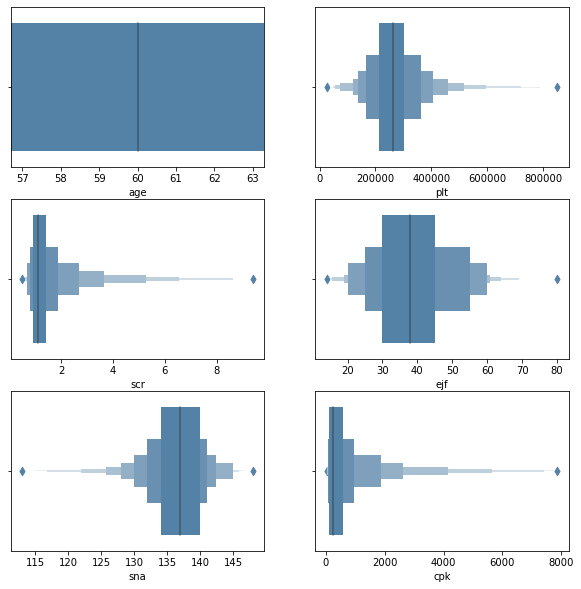

In [122]:
fig,ax = plt.subplots(3,2,figsize=[10,10])
num_features_set1 = ['age', 'scr', 'sna']
num_features_set2 = ['plt', 'ejf', 'cpk']
for i in range(0,3):
    sns.boxenplot(df[num_features_set1[i]], ax=ax[i,0], color='steelblue')
    sns.boxenplot(df[num_features_set2[i]], ax=ax[i,1], color='steelblue')

In [ ]:
sns.box

In [10]:
df.describe().round(2)

,age,plt,ejf,cpk,scr,sna,time,chk
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.0
mean,60.83,263358.03,38.08,581.84,1.39,136.63,130.26,1.0
std,11.89,97804.24,11.83,970.29,1.03,4.41,77.61,0.0
min,40.00,25100.00,14.00,23.00,0.50,113.00,4.00,1.0
25%,51.00,212500.00,30.00,116.50,0.90,134.00,73.00,1.0
50%,60.00,262000.00,38.00,250.00,1.10,137.00,115.00,1.0
75%,70.00,303500.00,45.00,582.00,1.40,140.00,203.00,1.0
max,95.00,850000.00,80.00,7861.00,9.40,148.00,285.00,1.0


### B. Summarizing Categorical Features

The categorical features are - 

- sex
- smoking
- diabetes
- high blood pressure
- anaemia

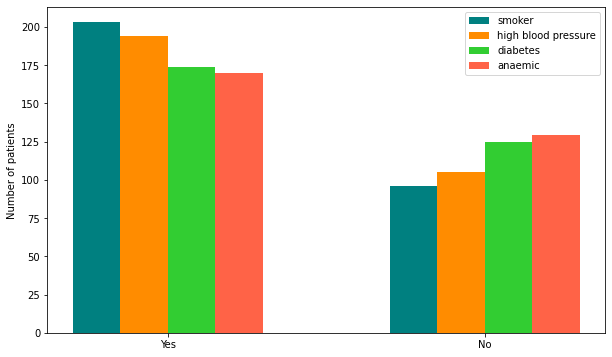

In [177]:
fig = plt.subplots(figsize=[10,6])

bar1 = df.smk.value_counts().values
bar2 = df.hbp.value_counts().values
bar3 = df.dia.value_counts().values
bar4 = df.anm.value_counts().values
ticks = np.arange(0,3, 2)
width = 0.3
plt.bar(ticks, bar1, width=width, color='teal', label='smoker')
plt.bar(ticks+width, bar2, width=width, color='darkorange', label='high blood pressure')
plt.bar(ticks+2*width, bar3, width=width, color='limegreen', label='diabetes')
plt.bar(ticks+3*width, bar4, width=width, color='tomato', label='anaemic')

plt.xticks(ticks+1.5*width, ['Yes', 'No'])
plt.ylabel('Number of patients')
plt.legend()

In [157]:
df.smk.value_counts()

No     203
Yes     96
Name: smk, dtype: int64

IndexError: list index out of range

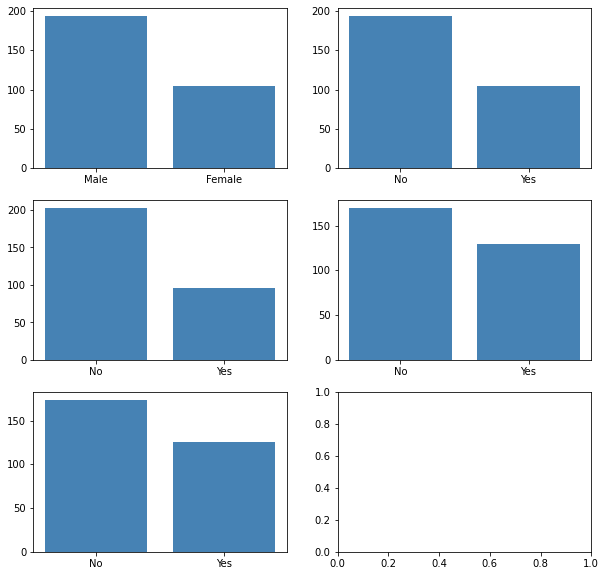

In [133]:
fig,ax = plt.subplots(3,2,figsize=[10,10])
cat_features_set1 = ['sex', 'smk', 'dia']
cat_features_set2 = ['hbp', 'anm']
for i in range(0,3):
    bar1 = df[cat_features_set1[i]].value_counts()
    ax[i,0].bar(bar1.index, bar1.values, color='steelblue')
    bar2 = df[cat_features_set2[i]].value_counts()
    ax[i,1].bar(bar2.index, bar2.values, color='steelblue')

In [11]:
pd.crosstab(index=df['anm'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100

death,No,Yes,All
anm,,,
No,59.0,52.0,57.0
Yes,41.0,48.0,43.0


In [12]:
pd.crosstab(index=df['smk'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100

death,No,Yes,All
smk,,,
No,67.0,69.0,68.0
Yes,33.0,31.0,32.0


In [13]:
pd.crosstab(index=df['sex'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100

death,No,Yes,All
sex,,,
Female,35.0,35.0,35.0
Male,65.0,65.0,65.0


In [14]:
pd.crosstab(index=df['dia'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100

death,No,Yes,All
dia,,,
No,58.0,58.0,58.0
Yes,42.0,42.0,42.0


In [15]:
pd.crosstab(index=df['hbp'], columns=df['death'], values=df['chk'], aggfunc=np.sum, margins=True, normalize='columns').round(2)*100

death,No,Yes,All
hbp,,,
No,67.0,59.0,65.0
Yes,33.0,41.0,35.0


### C. Exploring relationships between features

In [16]:
pd.pivot_table(df, 
               values='chk', 
               index=['smk','hbp','dia','anm'], 
               columns='death', 
               aggfunc=np.sum)#.apply(lambda x: x*100/x.sum(), axis=1).round(2)

death              No   Yes
smk hbp dia anm            
No  No  No  No   22.0  13.0
            Yes  18.0  12.0
        Yes No   27.0   7.0
            Yes  20.0   9.0
    Yes No  No   16.0   6.0
            Yes  14.0   7.0
        Yes No   11.0   6.0
            Yes   9.0   6.0
Yes No  No  No   26.0   6.0
            Yes  12.0   3.0
        Yes No    8.0   4.0
            Yes   4.0   3.0
    Yes No  No    6.0   3.0
            Yes   4.0   6.0
        Yes No    4.0   5.0
            Yes   2.0   NaN

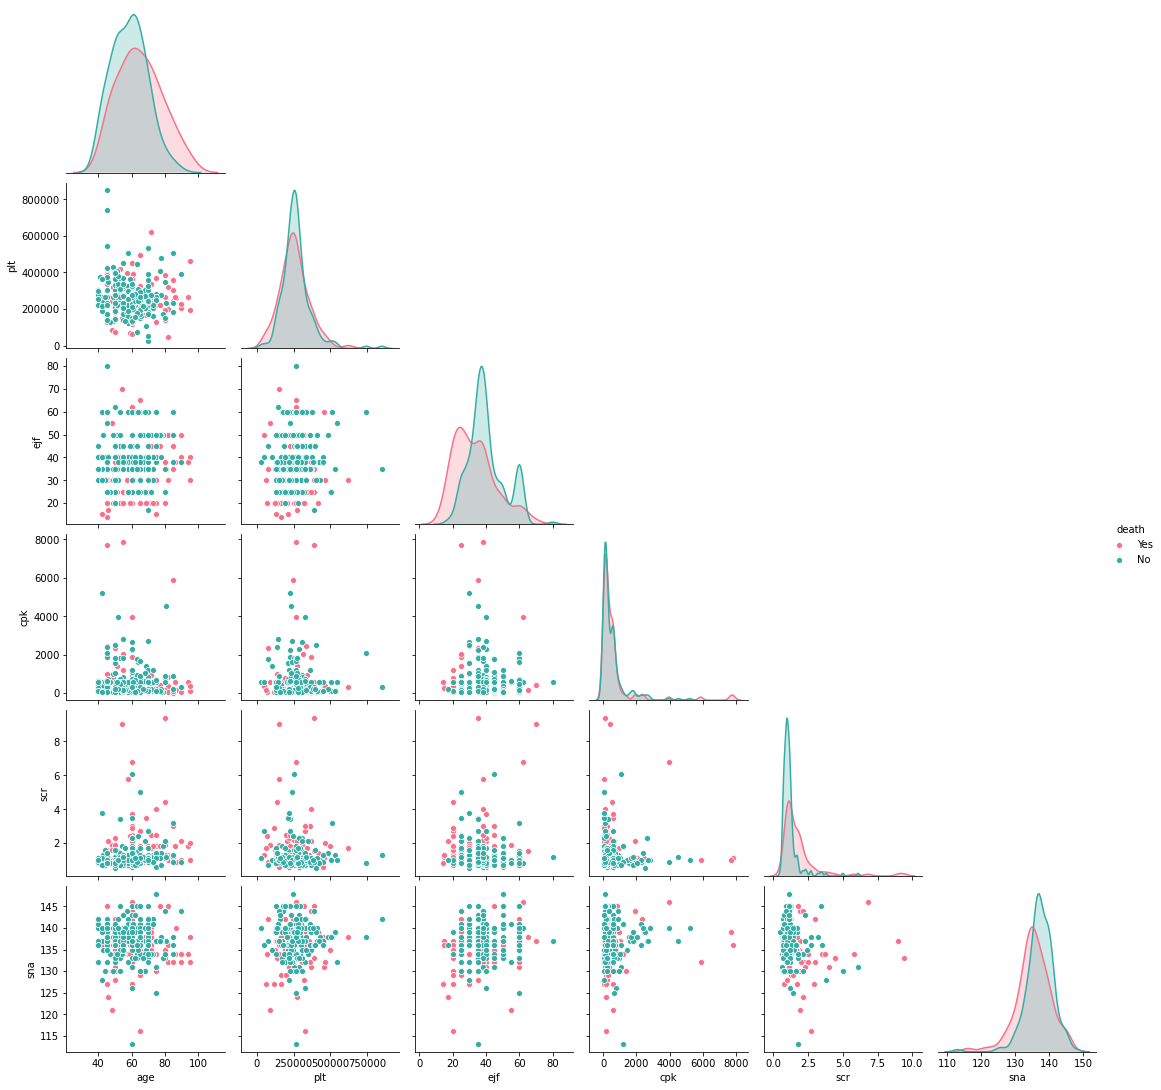

In [24]:
sns.pairplot(df[['age', 'plt', 'ejf', 'cpk', 'scr', 'sna','death']], 
             hue='death', palette='husl', corner=True)

In [25]:
df[['age', 'plt', 'ejf', 'cpk', 'scr', 'sna']].corr(method='spearman')

,age,plt,ejf,cpk,scr,sna
age,1.000000,-0.052091,0.074047,-0.093078,0.270561,-0.101716
plt,-0.052091,1.000000,0.053696,0.060033,-0.051028,0.049453
ejf,0.074047,0.053696,1.000000,-0.067839,-0.177986,0.161695
cpk,-0.093078,0.060033,-0.067839,1.000000,-0.049936,0.016886
scr,0.270561,-0.051028,-0.177986,-0.049936,1.000000,-0.300413
sna,-0.101716,0.049453,0.161695,0.016886,-0.300413,1.000000


Text(0.5, 1.0, 'Deceased')

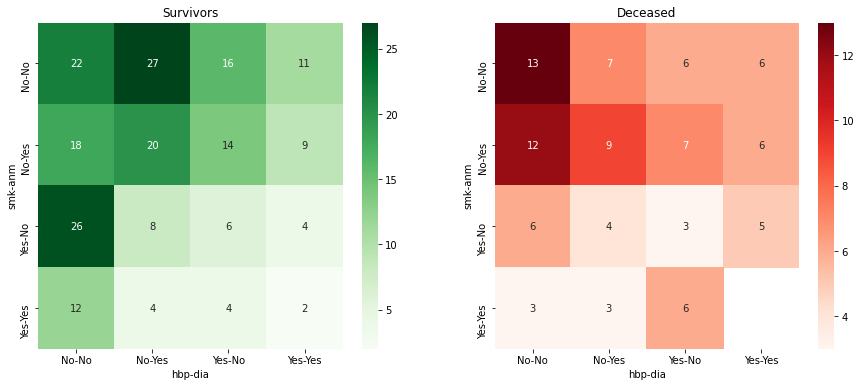

In [95]:
lifestyle_surv = pd.pivot_table(df.loc[df.death=='No'], 
                                values='chk', 
                                columns=['hbp','dia'], 
                                index=['smk','anm'], 
                                aggfunc=np.sum)

lifestyle_dead = pd.pivot_table(df.loc[df.death=='Yes'], 
                                values='chk', 
                                columns=['hbp','dia'], 
                                index=['smk','anm'], 
                                aggfunc=np.sum)

fig, ax= plt.subplots(1, 2, figsize=[15,6])
sns.heatmap(lifestyle_surv, cmap='Greens', annot=True, ax=ax[0])
ax[0].set_title('Survivors')
sns.heatmap(lifestyle_dead, cmap='Reds', annot=True, ax=ax[1])
ax[1].set_title('Deceased')

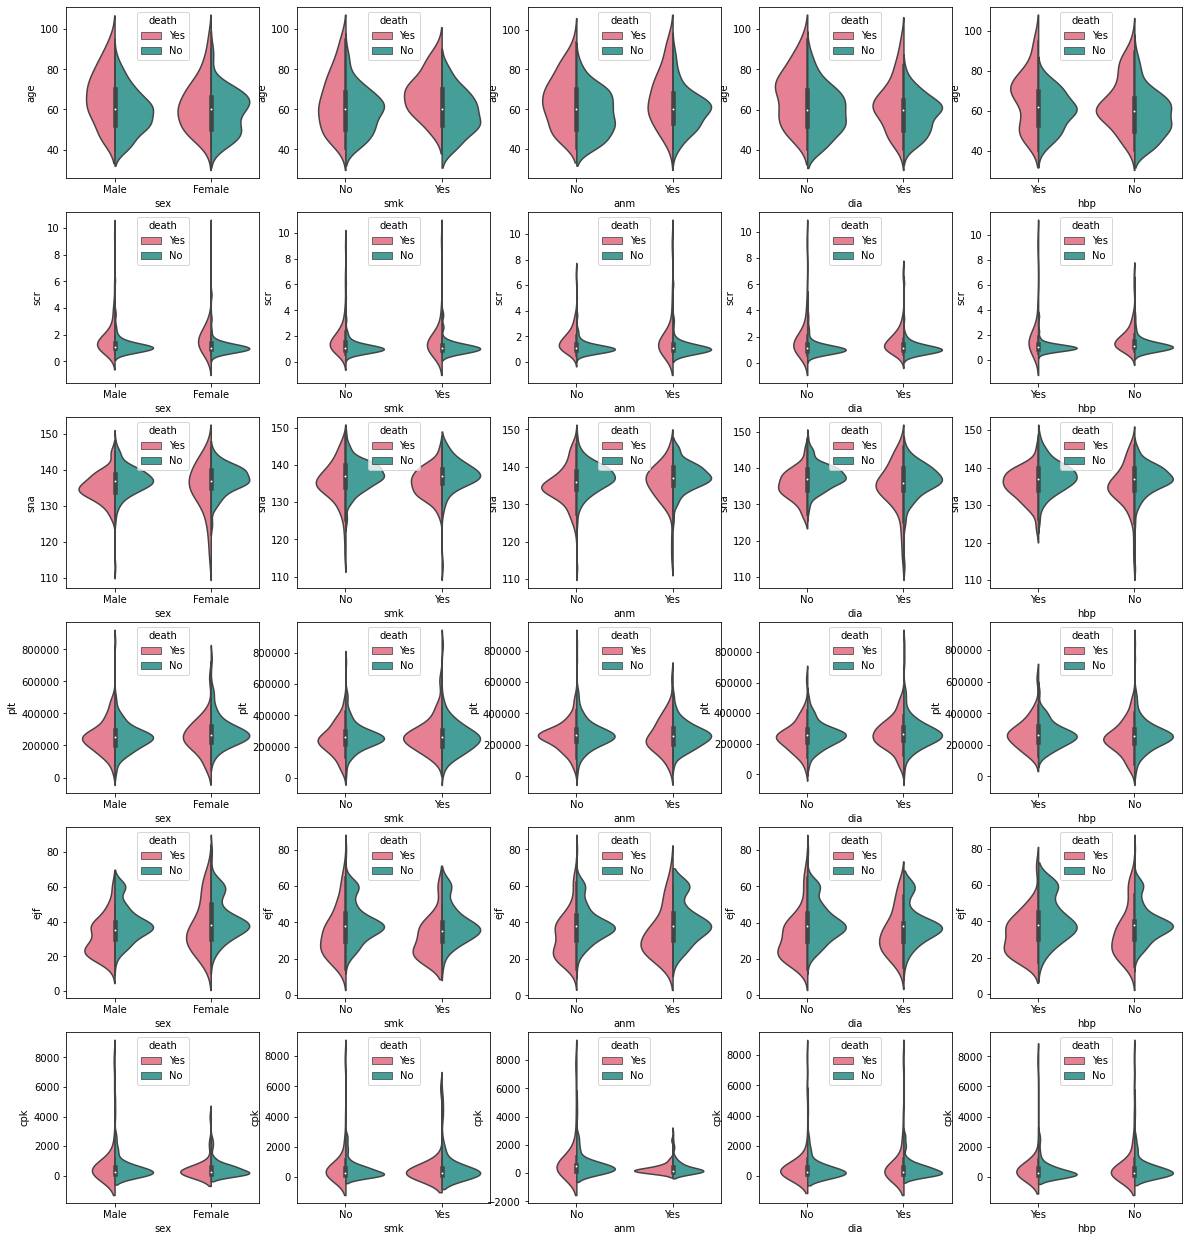

In [60]:
fig,ax = plt.subplots(6, 5, figsize=[20,22])
cat_features = ['sex','smk','anm', 'dia', 'hbp']
num_features = ['age', 'scr', 'sna', 'plt', 'ejf', 'cpk']
for i in range(0,6):
    for j in range(0,5):
        sns.violinplot(data=df, x=cat_features[j], y=num_features[i], hue='death', split=True,
                    palette='husl', facet_kws={'despine':False}, ax=ax[i,j])
        ax[i,j].legend(title='death', loc='upper center')